# Exploring the data

* What problem I am going to solve
* What kind of data I have
* Does this data have missing values
* Are there any outliers
* Can we add or remove some of the features

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [7]:
print(f"Missing Values:\n\n{df.isna().sum()} ")

Missing Values:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


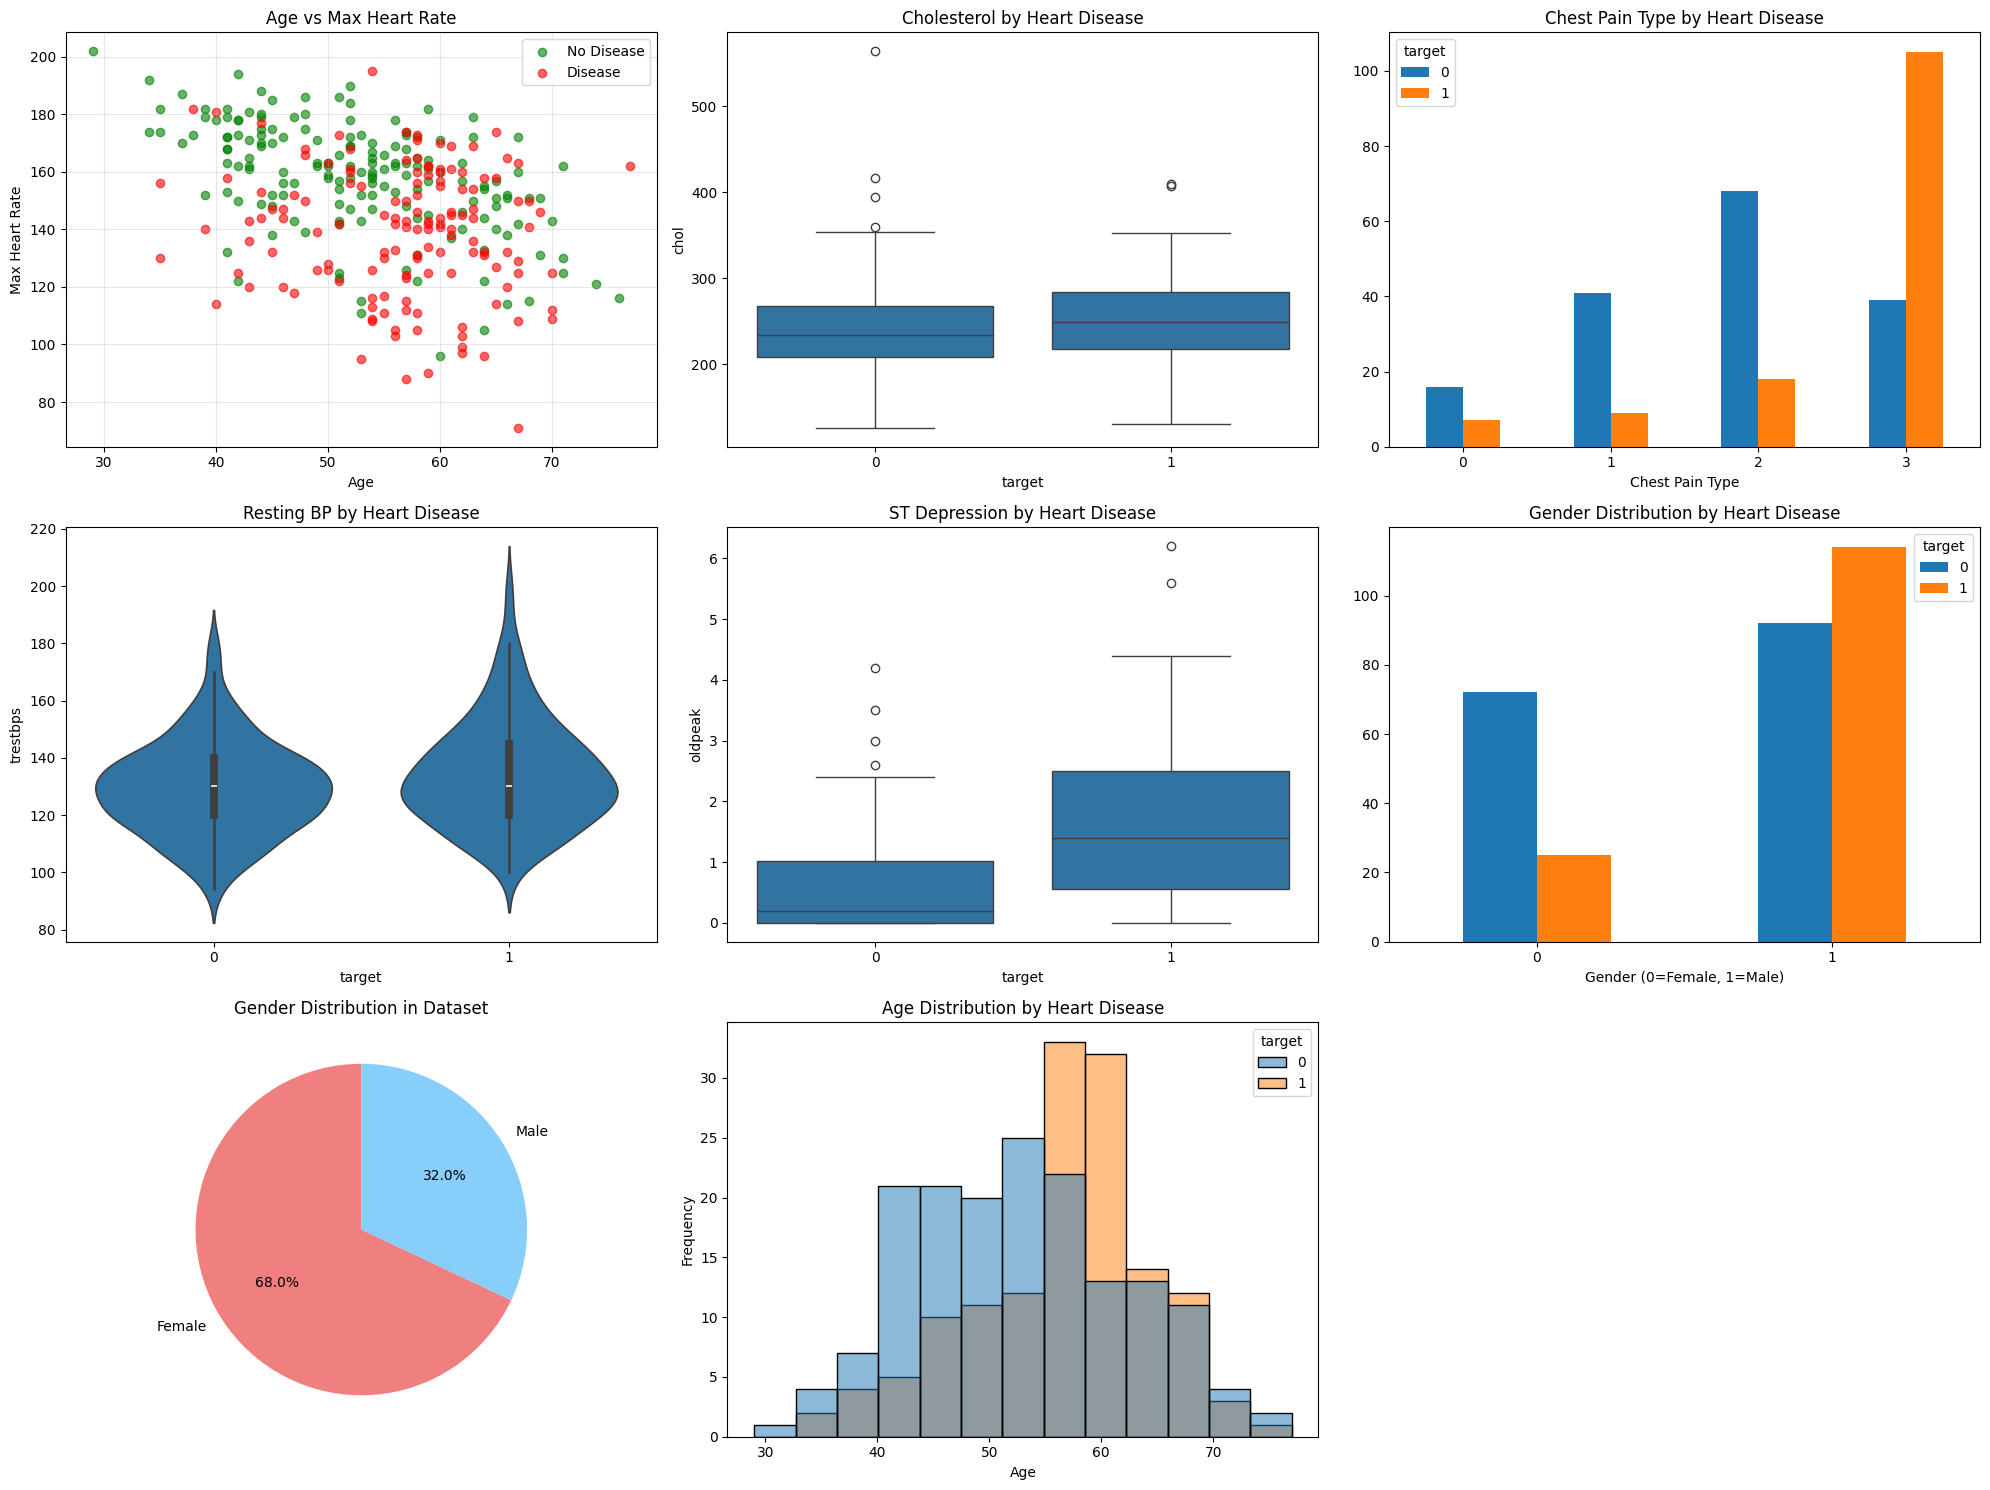

In [9]:
# Create visualizations for key features
plt.figure(figsize=(20, 15))

# Age vs Maximum Heart Rate
plt.subplot(3, 3, 1)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='green', alpha=0.6, label='No Disease')
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='red', alpha=0.6, label='Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')
plt.legend()
plt.grid(True, alpha=0.3)

# Cholesterol distribution
plt.subplot(3, 3, 2)
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol by Heart Disease')

# Chest pain type distribution
plt.subplot(3, 3, 3)
cp_counts = df.groupby(['cp', 'target']).size().unstack()
cp_counts.plot(kind='bar', ax=plt.gca())
plt.title('Chest Pain Type by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)

# Resting blood pressure
plt.subplot(3, 3, 4)
sns.violinplot(x='target', y='trestbps', data=df)
plt.title('Resting BP by Heart Disease')

# ST depression
plt.subplot(3, 3, 5)
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression by Heart Disease')

# Gender distribution
plt.subplot(3, 3, 6)
gender_counts = df.groupby(['sex', 'target']).size().unstack()
gender_counts.plot(kind='bar', ax=plt.gca())
plt.title('Gender Distribution by Heart Disease')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.xticks(rotation=0)

# Sex Distribution Pie Chart
plt.subplot(3, 3, 7)
sex_counts = df['sex'].value_counts()
colors = ['lightcoral', 'lightskyblue']
labels = ['Female', 'Male'] if 0 in sex_counts.index else ['Male', 'Female']
plt.pie(sex_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Gender Distribution in Dataset')

# Age Distribution by Heart Disease - Histogram
plt.subplot(3, 3, 8)
sns.histplot(data=df, x='age', hue='target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Heart Disease')

plt.tight_layout()
plt.show()

# Findings

1. AGE vs MAX HEART RATE SCATTER PLOT:

   * Patients with heart disease tend to have HIGHER maximum heart rates

   * Younger patients with disease show particularly elevated heart rates

   * Inverse relationship between age and max heart rate in healthy patients

2. CHOLESTEROL DISTRIBUTION BOX PLOT:

   * Cholesterol levels show SIGNIFICANT OVERLAP between groups

   * Slightly higher median cholesterol in disease group

   * Not a strong discriminator - many outliers in both groups

3. CHEST PAIN TYPE BY HEART DISEASE:

   * ASYMPTOMATIC pain (type 0) has HIGHEST disease prevalence

   * Typical angina (type 1) shows LOWER disease rates

   * Atypical pain patterns are strong disease indicators

4. RESTING BLOOD PRESSURE VIOLIN PLOT:

   * Similar distributions between disease and non-disease groups

   * Slight right shift in disease group indicates higher pressures

   * Wide spread suggests blood pressure alone isn't a reliable predictor

5. ST DEPRESSION (OLDPEAK) BOX PLOT:

   * CLEAR SEPARATION between groups

   * Heart disease patients have SIGNIFICANTLY HIGHER ST depression

   * Strong indicator - higher values correlate with disease presence

6. GENDER DISTRIBUTION BAR CHART:

   * Males show HIGHER absolute numbers of heart disease
   
   * However, need to consider base population rates
   
   * Both genders show substantial disease cases

7. GENDER DISTRIBUTION PIE CHART:

   * Dataset has [206] males and [97] females
   
   * Gender ratio: 68.0% male, 32.0% female

8. AGE DISTRIBUTION HISTOGRAM:
    
   * Heart disease prevalence INCREASES with age

   * Peak disease occurrence in 50-60 age range
   
   * Younger patients (30-40) show lower disease rates

9. HEART DISEASE BY GENDER:

   * Female disease prevalence: 25.8%

   * Male disease prevalence: 55.3%

   * Males have higher heart disease prevalence

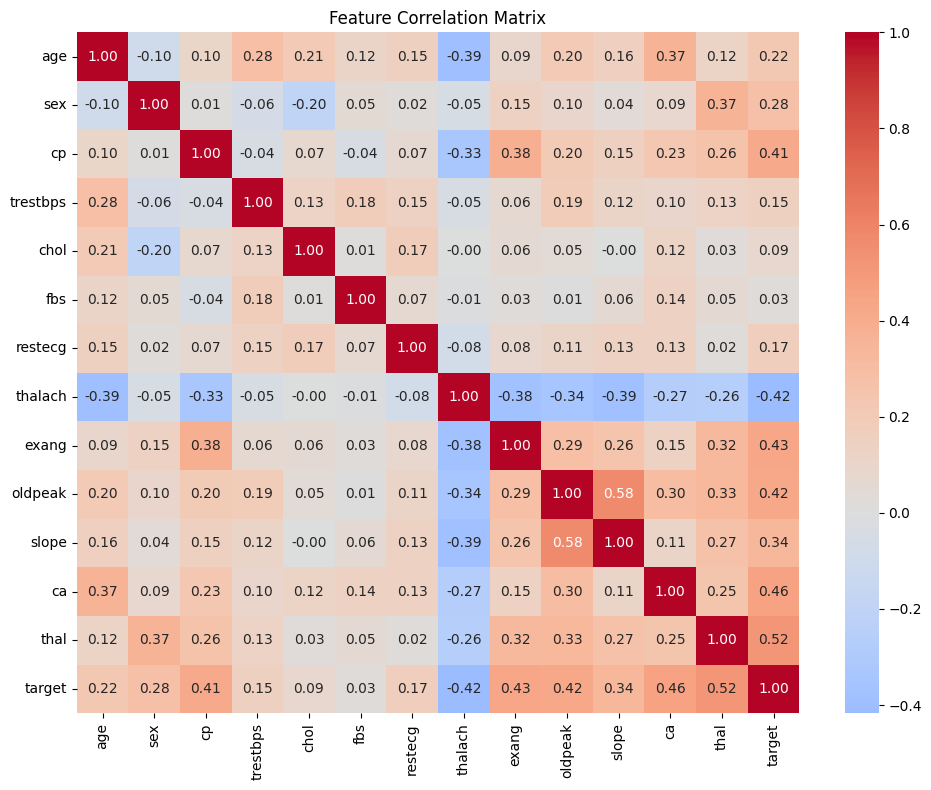

=== TOP CORRELATIONS WITH TARGET ===
target      1.000000
thal        0.515894
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("=== TOP CORRELATIONS WITH TARGET ===")
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlations)